<a href="https://colab.research.google.com/github/rsetaung/thesis/blob/main/Thesis_revised1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

### **Data prep**

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Grab the data that we need
IHO = pd.read_csv('/content/drive/MyDrive/Thesis/Incidents.csv')
IHO.head()

,Date,Country,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,Health Worker Working Within National Health Structure Arrested,National Health Worker Working for Unspecified Health Provider .2,Female Health Workers Arrested or Detained,Male Health Workers Arrested or Detained,Conflict-Related Violence,Political-Related Violence,COVID-19-Related Violence,Ebola-Related Violence,Vaccination-Related Violence,SiND Event ID
0,#date,#country +name,#country +code,#group +perp,#group +perp +name,#weapon,#indicator +health_facility +destroyed +num,#indicator +health_facility +damaged +num,#indicator +health_facility +armed_entry +num,#indicator +health_facility +occupy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/08/2016,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,21047.0
2,07/01/2017,Myanmar,MMR,Police,Government of Myanmar,Not Applicable - No Direct Violence,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,Politically-related,NotApplicable,NotApplicable,NotApplicable,20779.0
3,17/09/2017,Myanmar,MMR,NSA,Unidentified Armed Actor,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28191.0
4,01/12/2017,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28200.0


In [4]:
IHO = IHO.rename(columns={'Date': 'date'})
IHO = IHO.rename(columns={'Country': 'location'})
IHO = IHO.drop(0)

IHO.head()

,date,location,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,Health Worker Working Within National Health Structure Arrested,National Health Worker Working for Unspecified Health Provider .2,Female Health Workers Arrested or Detained,Male Health Workers Arrested or Detained,Conflict-Related Violence,Political-Related Violence,COVID-19-Related Violence,Ebola-Related Violence,Vaccination-Related Violence,SiND Event ID
1,16/08/2016,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,21047.0
2,07/01/2017,Myanmar,MMR,Police,Government of Myanmar,Not Applicable - No Direct Violence,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,Politically-related,NotApplicable,NotApplicable,NotApplicable,20779.0
3,17/09/2017,Myanmar,MMR,NSA,Unidentified Armed Actor,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,ConflictEvent,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28191.0
4,01/12/2017,Myanmar,MMR,Police,Government of Myanmar,Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,28200.0
5,05/04/2018,Myanmar,MMR,Police,Border Guard Forces (Myanmar),Firearms,0,0,0,0,...,0.0,0.0,0.0,0.0,NotApplicable,NotApplicable,NotApplicable,NotApplicable,NotApplicable,31737.0


In [5]:
index = IHO.columns.get_loc('Conflict-Related Violence')
index

61

In [6]:
IHO['date'] = pd.to_datetime(IHO['date'])

<ipython-input-6-763204b8c77c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  IHO['date'] = pd.to_datetime(IHO['date'])


In [7]:
pd.to_datetime(IHO['date'], format='%Y-%m-%d')

1     2016-08-16
2     2017-07-01
3     2017-09-17
4     2017-01-12
5     2018-05-04
         ...    
876   2023-06-04
877   2023-09-04
878   2023-09-04
879   2023-04-17
880   2023-04-18
Name: date, Length: 880, dtype: datetime64[ns]

In [8]:
IHO1 = ['Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted']

IHO['IHO_total'] = IHO[IHO1].sum(axis=1)

<ipython-input-8-ecc1de157558>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  IHO['IHO_total'] = IHO[IHO1].sum(axis=1)


<Axes: title={'center': "Myanmar's incidents of healthcare obstruction: post and prior coup"}, xlabel='date'>

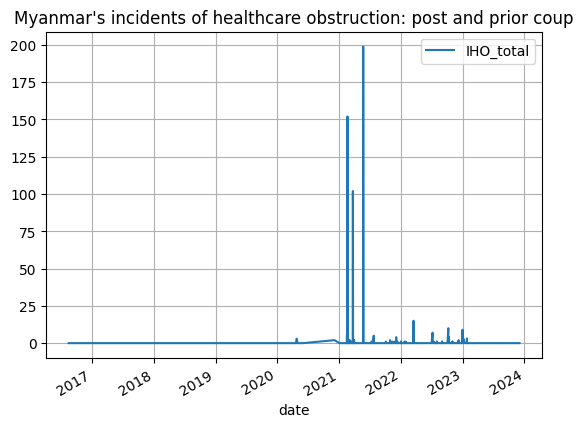

In [9]:
IHO.plot(x = 'date', y = 'IHO_total', grid = True, title = "Myanmar's incidents of healthcare obstruction: post and prior coup")

In [10]:
IHO.drop(columns=['IHO_total'], inplace=True)

In [11]:
CVD = pd.read_csv('/content/drive/MyDrive/Thesis/Covid.csv')
CVD.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [12]:
CVD = CVD[CVD['location'].str.contains('Myanmar')]
CVD = CVD.fillna(0)

CVD.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
187512,MMR,Asia,Myanmar,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187513,MMR,Asia,Myanmar,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187514,MMR,Asia,Myanmar,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187515,MMR,Asia,Myanmar,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
187516,MMR,Asia,Myanmar,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0


In [13]:
CVD = pd.DataFrame(CVD)

In [14]:
CVD['date'] = pd.to_datetime(CVD['date'])

In [15]:
pd.to_datetime(CVD['date'], format='%Y-%m-%d')

187512   2020-01-03
187513   2020-01-04
187514   2020-01-05
187515   2020-01-06
187516   2020-01-07
            ...    
188752   2023-05-27
188753   2023-05-28
188754   2023-05-29
188755   2023-05-30
188756   2023-05-31
Name: date, Length: 1245, dtype: datetime64[ns]

In [16]:
data = pd.merge(IHO, CVD, on = ['date'])
data.head()

,date,location_x,Country ISO,Reported Perpetrator,Reported Perpetrator Name,Weapon carried or used,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-06-02,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,No Information on the Weapon Used,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
1,2020-03-13,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,Combination,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
2,2020-12-04,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,Firearms,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
3,2020-04-20,Myanmar,MMR,NSA,Unidentified Armed Actor,Firearms,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0
4,2020-04-25,Myanmar,MMR,Armed Forces of Government or Self-Declared Go...,Myanmar Armed Forces,No Information on the Weapon Used,0,0,0,0,...,35.2,79.287,0.9,67.13,0.583,54179312,0.0,0.0,0.0,0.0


In [17]:
IDT = ['Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies',
 'Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted']

data['IDT_total'] = data[IDT].sum(axis=1)

<ipython-input-17-bb257fdd0c7f>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['IDT_total'] = data[IDT].sum(axis=1)


In [18]:
columns_to_delete = ['location_x',
 'Country ISO',
 'Reported Perpetrator',
 'Health Workers Assaulted',
 'Reported Perpetrator Name',
 'Weapon carried or used',
 'Obstruction to health care',
 'Reported Health Worker Profession',
 'Conflict-Related Violence',
 'Political-Related Violence',
 'COVID-19-Related Violence',
 'Ebola-Related Violence',
 'Vaccination-Related Violence',
 'SiND Event ID',
 'iso_code',
 'continent',
 'location_y',
  'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'population',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million',
'Health Workers Killed.1',
 'International Health Workers Working Within The Aid System Kill',
 'International Health Worker Outside The Aid Structure Killed',
 'National Employees of International Aid Agencies Killed',
 'National Employees of Local NGO Killed',
 'Health Worker Working Within National Health Structure Killed',
 'National Health Worker Working for Unspecified Health Provider ',
 'Health Workers Working for INGO, ICRC or UN Killed',
 'Health Workers Working for LNGO,  NGO or National Society of th',
 'Health Workers Working for local health structure killed',
 'Health Workers Killed In Captivity',
 'Female Health Workers Killed',
 'Male Health Workers Killed',
 'Health Workers Injured.1',
 'International Health Workers Working Within the Aid System Inju',
 'International Health Worker Outside the Aid Structure Injured',
 'National Employees of International Aid Agencies Injured',
 'Health Worker Working Within National Health Structure Injured',
 'National Health Worker Working For Unspecified Health Provider ',
 'Female Health Workers Injured',
 'Male Health Workers Injured ',
 'Health Workers Kidnapped.1',
 'International Health Workers Working Within the Aid System Kidn',
 'International Health Worker Outside the Aid Structure Kidnapped',
 'National Employees of International Aid Agencies Kidnapped',
 'Health Worker Working Within National Health Structure Kidnappe',
 'National Health Worker Working for Unspecified Health Provider .1',
 'Female Health Workers Kidnapped',
 'Male Health Workers Kidanpped',
 'Health Workers Arrested.1',
 'International Health Workers Working Within the Aid System Arre',
 'International Health Worker Outside the Aid Structure Arrested ',
 'National Employees of International Aid Agencies Arrested or De',
 'Health Worker Working Within National Health Structure Arrested',
 'National Health Worker Working for Unspecified Health Provider .2',
 'Female Health Workers Arrested or Detained',
 'Male Health Workers Arrested or Detained']

# Use the drop() method with the columns parameter to delete the specified columns
data.drop(columns=columns_to_delete, inplace=True)

In [19]:
pd.set_option('display.max_columns', None)
data.head()

,date,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Forceful Entry into Health Facility,Occupation of Health Facility,Health Transportation Destroyed,Health Transportation Damaged,Health Transportation Stolen/Highjacked,Looting/Theft/Robbery/Burglary of Health Supplies,Health Workers Killed,Health Workers Kidnapped,Health Workers Arrested,Health Workers Injured,Known Kidnapping/Arrest Outcome,Health Workers Threatened,Health Workers Sexually Assaulted,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,positive_rate,new_vaccinations_smoothed,IDT_total
0,2020-06-02,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,3.714,0.000,1134.0,0.0033,0.0,0.0
1,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.000,0.000,0.0,0.0000,0.0,0.0
2,2020-12-04,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,1401.857,26.000,18376.0,0.0769,0.0,2.0
3,2020-04-20,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0,0,10.000,0.143,340.0,0.0240,0.0,0.0
4,2020-04-25,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,7.143,0.000,319.0,0.0215,0.0,3.0


In [20]:
des_stats = data.describe()
des_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
Known Kidnapping/Arrest Outcome,842.0,0.681710,9.350024,0.0,0.000,0.00000,0.0000,199.0000
new_cases_smoothed,842.0,682.349160,1186.311316,0.0,18.143,139.21450,870.8570,5755.8570
new_deaths_smoothed,842.0,22.875342,62.193628,0.0,0.143,0.71400,13.4290,361.1430
new_tests_smoothed,842.0,7785.821853,8465.517551,0.0,0.000,1714.00000,15296.7500,31983.0000
positive_rate,842.0,0.049112,0.084163,0.0,0.000,0.01385,0.0503,0.3826
new_vaccinations_smoothed,842.0,77502.308789,100716.350395,0.0,0.000,19052.00000,158722.0000,366806.0000
IDT_total,842.0,0.681710,9.350024,0.0,0.000,0.00000,0.0000,199.0000


<Axes: title={'center': "Myanmar's COVID-19 fatalities"}, xlabel='date'>

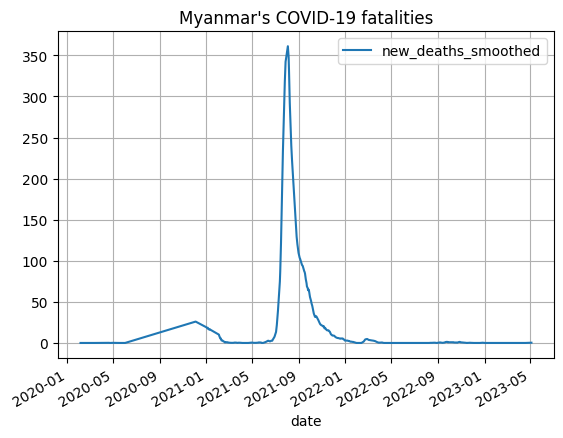

In [21]:
data.plot(x = 'date', y = 'new_deaths_smoothed', grid = True, title = "Myanmar's COVID-19 fatalities")

<Axes: title={'center': "Myanmar's incidents of healthcare obstruction"}, xlabel='date'>

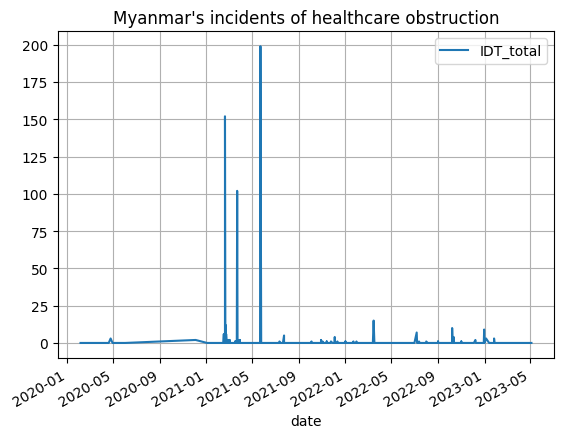

In [22]:
data.plot(x = 'date', y = 'IDT_total', grid = True, title = "Myanmar's incidents of healthcare obstruction")

In [23]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [24]:
sub = data.set_index(['date'], drop=False)
index_datetime = pd.to_datetime(sub['date'])

by_date = data.sort_values('date')

by_date['date'] = pd.to_datetime(by_date['date'], format = "%D")
by_date = by_date.set_index('date', drop = False)

<Axes: title={'center': 'Positive rate'}, xlabel='date'>

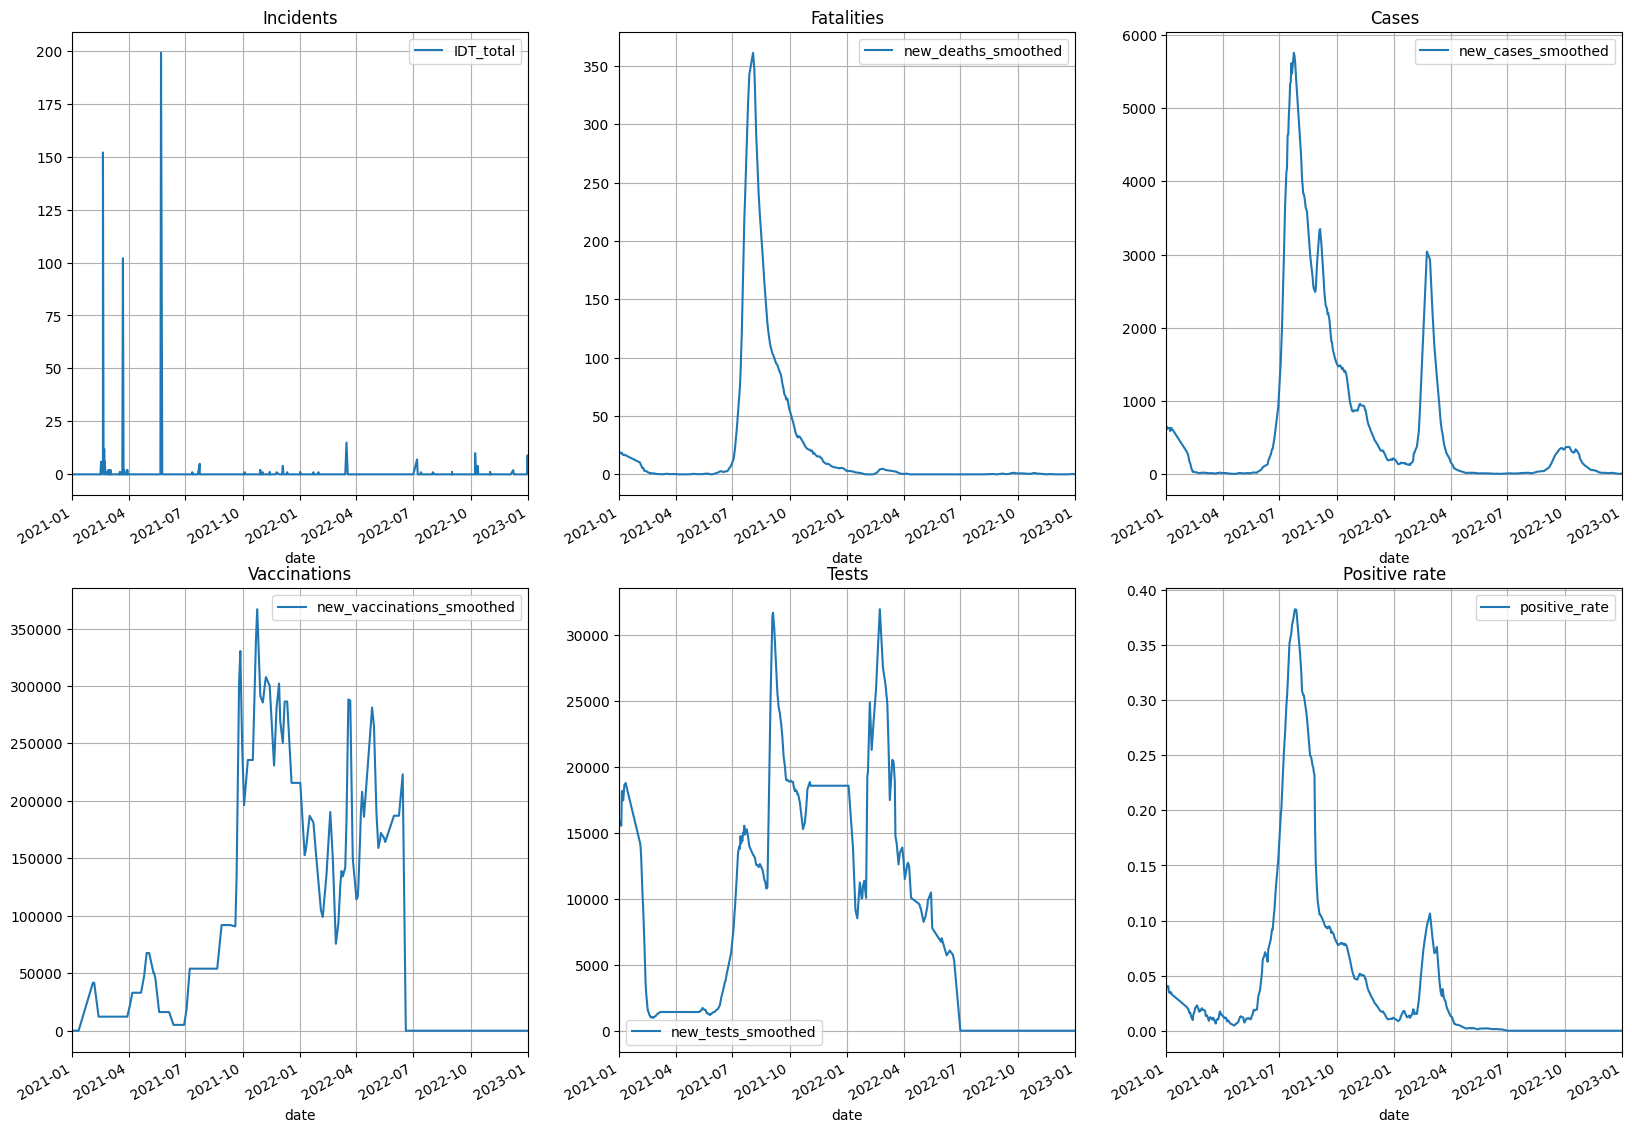

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
by_date.loc[:, ['IDT_total']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Incidents', ax = axes[0,0], grid = True)
by_date.loc[:, ['new_deaths_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Fatalities', ax = axes[0,1], grid = True)
by_date.loc[:, ['new_cases_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Cases', ax = axes[0,2], grid = True)
by_date.loc[:, ['new_vaccinations_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Vaccinations', ax = axes[1,0], grid = True)
by_date.loc[:, ['new_tests_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Tests', ax = axes[1,1], grid = True)
by_date.loc[:, ['positive_rate']].plot(xlim = ('2021-01-01', '2023-01-01'), title = 'Positive rate', ax = axes[1,2], grid = True)

### **Hypothesis 1**

In [26]:
lm = smf.ols('new_deaths_smoothed ~ IDT_total', data = by_date).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.4319
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):              0.511
Time:                         15:32:57   Log-Likelihood:                -4671.7
No. Observations:                  842   AIC:                             9347.
Df Residuals:                      840   BIC:                             9357.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9781      2.150     10.689      0.000      18.759      27.198
IDT_total     -0.1508      0.229     -0.657      0.511      -0.601       0.300
==============================================================================
Omnibus:                      690.583   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10334.738
Skew:                           3.861   Prob(JB):                         0.00
Kurtosis:                      18.328   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.compat import lzip
name = ['BP', 'p-value',
        'f-value', 'f p-value']

# use results of the model we fitted earlier
test = sm.stats.diagnostic.het_breuschpagan(lm.resid, lm.model.exog)
lzip(name, test)

[('BP', 0.17219416000918164),
 ('p-value', 0.6781691051224832),
 ('f-value', 0.17182028605410662),
 ('f p-value', 0.678604934282377)]

In [28]:
err = lm.resid

from statsmodels.tsa.stattools import acf

acf(err)

array([1.        , 0.99710577, 0.99289537, 0.98676401, 0.97873175,
       0.96905727, 0.9569147 , 0.94318803, 0.92772384, 0.91074947,
       0.89232618, 0.87246504, 0.8515106 , 0.82968624, 0.80691619,
       0.78366211, 0.7600786 , 0.73603501, 0.71181438, 0.68785648,
       0.6640443 , 0.64049435, 0.61712593, 0.5941078 , 0.5721572 ,
       0.55076369, 0.52999101, 0.50997848, 0.49070927, 0.47264369])

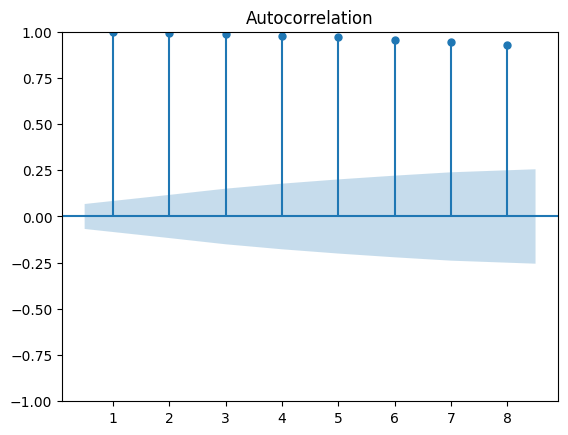

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(err, lags = 8, zero = False);

In [30]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(err)

0.0054676988050826126

In [31]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

lmtest, pval, fval, f_pval = acorr_breusch_godfrey(lm, nlags = 1)
print('LM test =', lmtest)
print('p-value =', pval)

LM test = 837.7209064677535
p-value = 3.396956392610876e-184


In [32]:
from statsmodels.compat import lzip
from statsmodels.graphics.tsaplots import plot_acf
import pylab
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.diagnostic import acorr_ljungbox

In [33]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.3 MB/s eta 0:00:00


In [34]:
N = len(by_date['new_deaths_smoothed'])  # Replace with your actual time series data

di = int(4 * (842 / 100) ** (2/9))
print("Number of lags:", di)

Number of lags: 6


In [35]:
from arch.unitroot import ADF

ADF(by_date['new_deaths_smoothed'], lags = 6, trend = 'c')

Test Statistic,-4.450
P-value,0.000
Lags,6


In [36]:
ADF(by_date['IDT_total'], lags = 6, trend = 'c').regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     118.6
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          2.62e-120
Time:                        15:33:07   Log-Likelihood:                -3053.9
No. Observations:                 835   AIC:                             6124.
Df Residuals:                     827   BIC:                             6162.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.9737      0.091    -10.733      0.000      -1.152      -0.796
Diff.L1       -0.0271      0.084     -0.322      0.748      -0.192       0.138
Diff.L2       -0.0280      0.077     -0.362      0.718      -0.180       0.124
Diff.L3       -0.0082      0.069     -0.118      0.906      -0.144       0.128
Diff.L4       -0.0123      0.060     -0.204      0.838      -0.131       0.106
Diff.L5        0.0105      0.049      0.212      0.832      -0.086       0.107
Diff.L6        0.0049      0.035      0.142      0.887      -0.063       0.073
const          0.6658      0.332      2.006      0.045       0.014       1.318
==============================================================================
Omnibus:                     1806.540   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3920627.009
Skew:                          17.864   Prob(JB):                         0.00
Kurtosis:                     336.785   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (1, 0, 0), exog = by_date[['new_deaths_smoothed', 'IDT_total']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(1, 0, 0)   Log Likelihood                8917.710
Date:                 Thu, 14 Sep 2023   AIC                         -17827.420
Time:                         15:33:07   BIC                         -17808.476
Sample:                              0   HQIC                        -17820.160
                                 - 842                                         
Covariance Type:                   opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
new_deaths_smoothed     1.0000   2.14e-23   4.68e+22      0.000       1.000       1.000
IDT_total            1.585e-18   7.89e-25   2.01e+06      0.000    1.58e-18    1.58e-18
ar.L1                   0.9961   2.05e-20   4.85e+19      0.000       0.996       0.996
sigma2                   1e-10   6.83e-11      1.464      0.143   -3.39e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                   3.26   Jarque-Bera (JB):            169109.07
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.14e+43. Standard errors may be unstable.
"""

In [38]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (1, 0, 0), exog = by_date[['new_deaths_smoothed', 'IDT_total', 'new_vaccinations_smoothed', 'new_cases_smoothed', 'new_tests_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(1, 0, 0)   Log Likelihood                8917.853
Date:                 Thu, 14 Sep 2023   AIC                         -17821.707
Time:                         15:33:08   BIC                         -17788.556
Sample:                              0   HQIC                        -17809.002
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000   1.58e-11   6.33e+10      0.000       1.000       1.000
IDT_total                  2.253e-18   5.29e-11   4.26e-08      1.000   -1.04e-10    1.04e-10
new_vaccinations_smoothed -5.358e-17   3.53e-05  -1.52e-12      1.000   -6.92e-05    6.92e-05
new_cases_smoothed        -7.326e-17   5.36e-09  -1.37e-08      1.000   -1.05e-08    1.05e-08
new_tests_smoothed         1.657e-17   1.85e-08   8.97e-10      1.000   -3.62e-08    3.62e-08
ar.L1                         0.9948   3.67e-10   2.71e+09      0.000       0.995       0.995
sigma2                         1e-10   6.86e-11      1.458      0.145   -3.44e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                  25.19   Jarque-Bera (JB):            548297.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              18.97   Skew:                            -5.47
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.22e+27. Standard errors may be unstable.
"""

In [39]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


In [40]:
from pmdarima import auto_arima

auto_arima(lm.resid, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4631.779, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4956.624, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4908.484, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4927.009, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4954.624, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4700.230, Time=1.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4710.445, Time=2.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4703.468, Time=3.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4694.380, Time=2.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4742.150, Time=1.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4685.125, Time=1.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4705.396, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4631.541, Time=5.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.04 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order=(4, 1, 5), exog=by_date['IDT_total']).fit()
arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood               -2134.646
Date:                 Thu, 14 Sep 2023   AIC                           4291.291
Time:                         15:35:05   BIC                           4343.372
Sample:                              0   HQIC                          4311.251
                                 - 842                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IDT_total      0.0029      0.030      0.096      0.924      -0.056       0.062
ar.L1          0.5039      0.021     23.937      0.000       0.463       0.545
ar.L2          0.5004      0.017     29.690      0.000       0.467       0.533
ar.L3          0.6139      0.015     41.236      0.000       0.585       0.643
ar.L4         -0.6861      0.022    -31.132      0.000      -0.729      -0.643
ma.L1         -0.4055      0.025    -16.076      0.000      -0.455      -0.356
ma.L2         -0.3870      0.023    -16.495      0.000      -0.433      -0.341
ma.L3         -0.7299      0.016    -44.443      0.000      -0.762      -0.698
ma.L4          0.6841      0.018     38.979      0.000       0.650       0.719
ma.L5          0.1906      0.015     12.892      0.000       0.162       0.220
sigma2         9.3504      0.128     72.778      0.000       9.099       9.602
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             55741.04
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (4, 1, 5), exog = by_date[['new_deaths_smoothed', 'IDT_total', 'new_vaccinations_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood                8898.629
Date:                 Thu, 14 Sep 2023   AIC                         -17771.258
Time:                         15:35:09   BIC                         -17709.708
Sample:                              0   HQIC                        -17747.669
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000    8.2e-24   1.22e+23      0.000       1.000       1.000
IDT_total                  2.494e-18   1.03e-24   2.43e+06      0.000    2.49e-18    2.49e-18
new_vaccinations_smoothed -1.245e-19   2.81e-20     -4.436      0.000    -1.8e-19   -6.95e-20
ar.L1                         0.3220   4.32e-22   7.45e+20      0.000       0.322       0.322
ar.L2                         0.5058   3.24e-22   1.56e+21      0.000       0.506       0.506
ar.L3                         0.3156   3.23e-22   9.77e+20      0.000       0.316       0.316
ar.L4                        -0.3179   2.59e-22  -1.23e+21      0.000      -0.318      -0.318
ma.L1                        -0.1087   2.51e-22  -4.34e+20      0.000      -0.109      -0.109
ma.L2                        -0.4090   1.48e-22  -2.76e+21      0.000      -0.409      -0.409
ma.L3                        -0.3227   1.63e-22  -1.98e+21      0.000      -0.323      -0.323
ma.L4                         0.2096   1.15e-22   1.82e+21      0.000       0.210       0.210
ma.L5                         0.1159   2.35e-22   4.92e+20      0.000       0.116       0.116
sigma2                         1e-10   6.84e-11      1.462      0.144    -3.4e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                 183.36   Jarque-Bera (JB):            512602.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+46. Standard errors may be unstable.
"""

In [43]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (4, 1, 5), exog = by_date[['new_deaths_smoothed', 'IDT_total', 'new_vaccinations_smoothed', 'new_cases_smoothed', 'new_tests_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood                8898.949
Date:                 Thu, 14 Sep 2023   AIC                         -17767.898
Time:                         15:35:14   BIC                         -17696.879
Sample:                              0   HQIC                        -17740.680
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000   8.14e-24   1.23e+23      0.000       1.000       1.000
IDT_total                  1.431e-17   3.93e-24   3.64e+06      0.000    1.43e-17    1.43e-17
new_vaccinations_smoothed -5.527e-19   1.27e-19     -4.360      0.000   -8.01e-19   -3.04e-19
new_cases_smoothed         1.301e-17   4.07e-22   3.19e+04      0.000     1.3e-17     1.3e-17
new_tests_smoothed         3.253e-18   5.03e-21    647.050      0.000    3.24e-18    3.26e-18
ar.L1                             -0   1.65e-22         -0      1.000   -3.23e-22    3.23e-22
ar.L2                             -0   1.22e-34         -0      1.000   -2.39e-34    2.39e-34
ar.L3                             -0   1.65e-32         -0      1.000   -3.24e-32    3.24e-32
ar.L4                             -0   1.12e-32         -0      1.000    -2.2e-32     2.2e-32
ma.L1                              0   1.65e-22          0      1.000   -3.23e-22    3.23e-22
ma.L2                              0   3.25e-38          0      1.000   -6.37e-38    6.37e-38
ma.L3                             -0   4.43e-39         -0      1.000   -8.69e-39    8.69e-39
ma.L4                             -0   4.45e-40         -0      1.000   -8.72e-40    8.72e-40
ma.L5                             -0   7.22e-39         -0      1.000   -1.42e-38    1.42e-38
sigma2                         1e-10   6.84e-11      1.462      0.144    -3.4e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                  12.85   Jarque-Bera (JB):             75336.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.65   Skew:                            -2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.98e+74. Standard errors may be unstable.
"""

**Alt explanation #1**

In [44]:
lag_periods = 100  # Number of periods to shift
by_date['IDT_lag'] = by_date['IDT_total'].shift(lag_periods)

In [45]:
row_index = 99

# Retrieve all column values at the specified row index
row_values = by_date.iloc[row_index]

print(row_values)

date                                                            2021-03-16 00:00:00
Number of Attacks on Health Facilities Reporting Destruction                      0
Number of Attacks on Health Facilities Reporting Damaged                          0
Forceful Entry into Health Facility                                               0
Occupation of Health Facility                                                     0
Health Transportation Destroyed                                                   0
Health Transportation Damaged                                                     0
Health Transportation Stolen/Highjacked                                           0
Looting/Theft/Robbery/Burglary of Health Supplies                                 0
Health Workers Killed                                                             0
Health Workers Kidnapped                                                          0
Health Workers Arrested                                                     

In [46]:
lm_1 = smf.ols('new_deaths_smoothed ~ IDT_lag', data = by_date).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     10.82
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):            0.00105
Time:                         15:35:14   Log-Likelihood:                -4153.5
No. Observations:                  742   AIC:                             8311.
Df Residuals:                      740   BIC:                             8320.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8127      2.407     10.309      0.000      20.088      29.538
IDT_lag        0.7938      0.241      3.289      0.001       0.320       1.268
==============================================================================
Omnibus:                      563.043   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6605.965
Skew:                           3.518   Prob(JB):                         0.00
Kurtosis:                      15.812   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='date'>

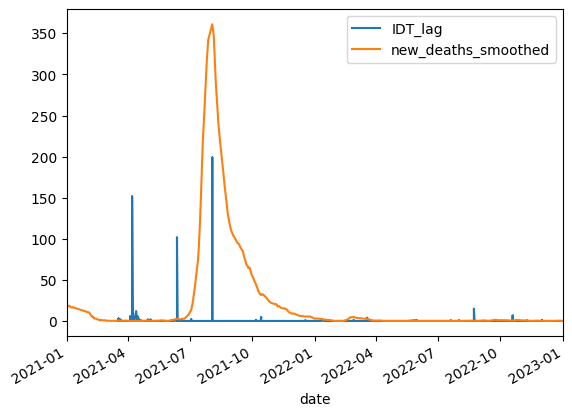

In [47]:
by_date.loc[:, ['IDT_lag', 'new_deaths_smoothed']].plot(xlim = ('2021-01-01', '2023-01-01'))

In [48]:
lm_2 = smf.ols('new_deaths_smoothed ~ IDT_lag + new_vaccinations_smoothed', data = by_date).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     5.768
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):            0.00327
Time:                         15:35:16   Log-Likelihood:                -4153.1
No. Observations:                  742   AIC:                             8312.
Df Residuals:                      739   BIC:                             8326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    23.1167      3.128      7.389      0.000      16.975      29.259
IDT_lag                       0.8008      0.242      3.316      0.001       0.327       1.275
new_vaccinations_smoothed  1.959e-05   2.31e-05      0.849      0.396   -2.57e-05    6.49e-05
==============================================================================
Omnibus:                      567.100   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6761.828
Skew:                           3.548   Prob(JB):                         0.00
Kurtosis:                      15.976   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
from patsy import dmatrices
y, X = dmatrices('new_deaths_smoothed ~ IDT_lag + new_vaccinations_smoothed',
                 data = by_date, return_type = 'dataframe')

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.698612,Intercept
1,1.001176,IDT_lag
2,1.001176,new_vaccinations_smoothed


In [51]:
lm_2 = smf.ols('new_deaths_smoothed ~ IDT_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed', data = by_date).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.783
Model:                             OLS   Adj. R-squared:                  0.782
Method:                  Least Squares   F-statistic:                     665.9
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):          5.62e-243
Time:                         15:35:17   Log-Likelihood:                -3591.6
No. Observations:                  742   AIC:                             7193.
Df Residuals:                      737   BIC:                             7216.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.5280      1.591     -2.846      0.005      -7.652      -1.404
IDT_lag                       0.3998      0.114      3.513      0.000       0.176       0.623
new_vaccinations_smoothed     0.0001      2e-05      6.316      0.000    8.68e-05       0.000
new_cases_smoothed            0.0554      0.001     41.622      0.000       0.053       0.058
new_tests_smoothed           -0.0028      0.000     -9.842      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      171.932   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.233
Skew:                           0.575   Prob(JB):                         0.00
Kurtosis:                      12.292   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
y, X = dmatrices('new_deaths_smoothed ~ IDT_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.990842,Intercept
1,1.007026,IDT_lag
2,3.390181,new_vaccinations_smoothed
3,2.146640,new_cases_smoothed
4,4.851691,new_tests_smoothed


**Branch off_Human and Infra**

In [53]:
IDT_1 = ['Number of Attacks on Health Facilities Reporting Destruction',
 'Number of Attacks on Health Facilities Reporting Damaged',
 'Forceful Entry into Health Facility',
 'Occupation of Health Facility',
 'Health Transportation Destroyed',
 'Health Transportation Damaged',
 'Health Transportation Stolen/Highjacked',
 'Looting/Theft/Robbery/Burglary of Health Supplies']

by_date['IDT_infra'] = by_date[IDT_1].sum(axis=1)

In [54]:
IDT_2 = ['Health Workers Killed',
 'Health Workers Kidnapped',
 'Health Workers Arrested',
 'Health Workers Injured',
 'Known Kidnapping/Arrest Outcome',
 'Health Workers Threatened',
 'Health Workers Sexually Assaulted']

by_date['IDT_human'] = by_date[IDT_2].sum(axis=1)

<ipython-input-54-cb61f45182d0>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  by_date['IDT_human'] = by_date[IDT_2].sum(axis=1)


In [55]:
lm_human = smf.ols('new_deaths_smoothed ~ IDT_human', data = by_date).fit()
lm_human.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.4319
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):              0.511
Time:                         15:35:17   Log-Likelihood:                -4671.7
No. Observations:                  842   AIC:                             9347.
Df Residuals:                      840   BIC:                             9357.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.9781      2.150     10.689      0.000      18.759      27.198
IDT_human     -0.1508      0.229     -0.657      0.511      -0.601       0.300
==============================================================================
Omnibus:                      690.583   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10334.738
Skew:                           3.861   Prob(JB):                         0.00
Kurtosis:                      18.328   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from pmdarima import auto_arima

auto_arima(lm_human.resid, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4631.779, Time=4.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4956.624, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4908.484, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4927.009, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4954.624, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4700.230, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4710.445, Time=1.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4703.468, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4694.380, Time=1.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4742.150, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4685.125, Time=2.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4705.396, Time=1.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4631.541, Time=4.23 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : 

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [87]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order=(4, 1, 5), exog=by_date['IDT_human']).fit()
arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood               -2134.646
Date:                 Thu, 14 Sep 2023   AIC                           4291.291
Time:                         15:42:14   BIC                           4343.372
Sample:                              0   HQIC                          4311.251
                                 - 842                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IDT_human      0.0029      0.030      0.096      0.924      -0.056       0.062
ar.L1          0.5039      0.021     23.937      0.000       0.463       0.545
ar.L2          0.5004      0.017     29.690      0.000       0.467       0.533
ar.L3          0.6139      0.015     41.236      0.000       0.585       0.643
ar.L4         -0.6861      0.022    -31.132      0.000      -0.729      -0.643
ma.L1         -0.4055      0.025    -16.076      0.000      -0.455      -0.356
ma.L2         -0.3870      0.023    -16.495      0.000      -0.433      -0.341
ma.L3         -0.7299      0.016    -44.443      0.000      -0.762      -0.698
ma.L4          0.6841      0.018     38.979      0.000       0.650       0.719
ma.L5          0.1906      0.015     12.892      0.000       0.162       0.220
sigma2         9.3504      0.128     72.778      0.000       9.099       9.602
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             55741.04
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (4, 1, 5), exog = by_date[['new_deaths_smoothed', 'IDT_human', 'new_vaccinations_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood                8898.629
Date:                 Thu, 14 Sep 2023   AIC                         -17771.258
Time:                         15:42:18   BIC                         -17709.708
Sample:                              0   HQIC                        -17747.669
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000    8.2e-24   1.22e+23      0.000       1.000       1.000
IDT_human                  2.494e-18   1.03e-24   2.43e+06      0.000    2.49e-18    2.49e-18
new_vaccinations_smoothed -1.245e-19   2.81e-20     -4.436      0.000    -1.8e-19   -6.95e-20
ar.L1                         0.3220   4.32e-22   7.45e+20      0.000       0.322       0.322
ar.L2                         0.5058   3.24e-22   1.56e+21      0.000       0.506       0.506
ar.L3                         0.3156   3.23e-22   9.77e+20      0.000       0.316       0.316
ar.L4                        -0.3179   2.59e-22  -1.23e+21      0.000      -0.318      -0.318
ma.L1                        -0.1087   2.51e-22  -4.34e+20      0.000      -0.109      -0.109
ma.L2                        -0.4090   1.48e-22  -2.76e+21      0.000      -0.409      -0.409
ma.L3                        -0.3227   1.63e-22  -1.98e+21      0.000      -0.323      -0.323
ma.L4                         0.2096   1.15e-22   1.82e+21      0.000       0.210       0.210
ma.L5                         0.1159   2.35e-22   4.92e+20      0.000       0.116       0.116
sigma2                         1e-10   6.84e-11      1.462      0.144    -3.4e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                 183.36   Jarque-Bera (JB):            512602.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+46. Standard errors may be unstable.
"""

In [89]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (4, 1, 5), exog = by_date[['new_deaths_smoothed', 'IDT_human', 'new_vaccinations_smoothed', 'new_cases_smoothed', 'new_tests_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(4, 1, 5)   Log Likelihood                8898.949
Date:                 Thu, 14 Sep 2023   AIC                         -17767.898
Time:                         15:42:30   BIC                         -17696.879
Sample:                              0   HQIC                        -17740.680
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000   8.14e-24   1.23e+23      0.000       1.000       1.000
IDT_human                  1.431e-17   3.93e-24   3.64e+06      0.000    1.43e-17    1.43e-17
new_vaccinations_smoothed -5.527e-19   1.27e-19     -4.360      0.000   -8.01e-19   -3.04e-19
new_cases_smoothed         1.301e-17   4.07e-22   3.19e+04      0.000     1.3e-17     1.3e-17
new_tests_smoothed         3.253e-18   5.03e-21    647.050      0.000    3.24e-18    3.26e-18
ar.L1                             -0   1.65e-22         -0      1.000   -3.23e-22    3.23e-22
ar.L2                             -0   1.22e-34         -0      1.000   -2.39e-34    2.39e-34
ar.L3                             -0   1.65e-32         -0      1.000   -3.24e-32    3.24e-32
ar.L4                             -0   1.12e-32         -0      1.000    -2.2e-32     2.2e-32
ma.L1                              0   1.65e-22          0      1.000   -3.23e-22    3.23e-22
ma.L2                              0   3.25e-38          0      1.000   -6.37e-38    6.37e-38
ma.L3                             -0   4.43e-39         -0      1.000   -8.69e-39    8.69e-39
ma.L4                             -0   4.45e-40         -0      1.000   -8.72e-40    8.72e-40
ma.L5                             -0   7.22e-39         -0      1.000   -1.42e-38    1.42e-38
sigma2                         1e-10   6.84e-11      1.462      0.144    -3.4e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                  12.85   Jarque-Bera (JB):             75336.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.65   Skew:                            -2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.98e+74. Standard errors may be unstable.
"""

In [60]:
lm_infra = smf.ols('new_deaths_smoothed ~ IDT_infra', data = by_date).fit()
lm_infra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.003
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):              0.157
Time:                         15:36:40   Log-Likelihood:                -4670.9
No. Observations:                  842   AIC:                             9346.
Df Residuals:                      840   BIC:                             9355.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5857      2.200     10.720      0.000      19.267      27.904
IDT_infra  -1.311e-06   9.26e-07     -1.415      0.157   -3.13e-06    5.07e-07
==============================================================================
Omnibus:                      689.932   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10306.709
Skew:                           3.857   Prob(JB):                         0.00
Kurtosis:                      18.306   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
auto_arima(lm_infra.resid, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5129.091, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5360.377, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5360.920, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5361.383, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5358.377, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5170.820, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5205.502, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5110.428, Time=1.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5194.460, Time=1.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5107.654, Time=4.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5184.378, Time=0.83 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=5104.100, Time=3.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5165.500, Time=0.85 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=5111.539, Time=3.41 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

ARIMA(order=(5, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [90]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order=(5, 1, 2), exog=by_date['IDT_infra']).fit()
arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(5, 1, 2)   Log Likelihood               -2177.151
Date:                 Thu, 14 Sep 2023   AIC                           4372.301
Time:                         15:42:56   BIC                           4414.913
Sample:                              0   HQIC                          4388.632
                                 - 842                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IDT_infra  -2.362e-08   2.34e-08     -1.008      0.313   -6.95e-08    2.23e-08
ar.L1          0.1273      0.041      3.126      0.002       0.047       0.207
ar.L2          0.2071      0.038      5.490      0.000       0.133       0.281
ar.L3          0.1153      0.016      7.308      0.000       0.084       0.146
ar.L4          0.0421      0.015      2.747      0.006       0.012       0.072
ar.L5          0.3451      0.013     25.953      0.000       0.319       0.371
ma.L1          0.0140      0.041      0.339      0.735      -0.067       0.095
ma.L2         -0.0524      0.036     -1.443      0.149      -0.124       0.019
sigma2         9.6391      0.103     93.264      0.000       9.437       9.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             80256.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (5, 1, 2), exog = by_date[['new_deaths_smoothed', 'IDT_infra', 'new_vaccinations_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(5, 1, 2)   Log Likelihood                8898.567
Date:                 Thu, 14 Sep 2023   AIC                         -17775.134
Time:                         15:42:59   BIC                         -17723.054
Sample:                              0   HQIC                        -17755.175
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000   1.82e-10    5.5e+09      0.000       1.000       1.000
IDT_infra                 -5.294e-23      0.000  -2.51e-19      1.000      -0.000       0.000
new_vaccinations_smoothed  3.388e-21   9.76e-10   3.47e-12      1.000   -1.91e-09    1.91e-09
ar.L1                         0.1122   4.58e-10   2.45e+08      0.000       0.112       0.112
ar.L2                         0.3848    3.1e-10   1.24e+09      0.000       0.385       0.385
ar.L3                         0.0701   3.33e-10   2.11e+08      0.000       0.070       0.070
ar.L4                        -0.0025   2.83e-10   -8.9e+06      0.000      -0.003      -0.003
ar.L5                         0.3235   4.24e-10   7.62e+08      0.000       0.323       0.323
ma.L1                        -0.0032   2.03e-10  -1.56e+07      0.000      -0.003      -0.003
ma.L2                        -0.2201   3.61e-11   -6.1e+09      0.000      -0.220      -0.220
sigma2                         1e-10   6.85e-11      1.460      0.144   -3.42e-11    2.34e-10
===================================================================================
Ljung-Box (L1) (Q):                  10.53   Jarque-Bera (JB):            185956.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        75.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.59e+28. Standard errors may be unstable.
"""

In [92]:
arima_idt = SARIMAX(by_date['new_deaths_smoothed'], order = (5, 1, 2), exog = by_date[['new_deaths_smoothed', 'IDT_infra', 'new_vaccinations_smoothed', 'new_cases_smoothed', 'new_tests_smoothed']]).\
                    fit(trend='nc')

arima_idt.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilo

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     new_deaths_smoothed   No. Observations:                  842
Model:                SARIMAX(5, 1, 2)   Log Likelihood                8907.773
Date:                 Thu, 14 Sep 2023   AIC                         -17789.546
Time:                         15:43:03   BIC                         -17727.996
Sample:                              0   HQIC                        -17765.957
                                 - 842                                         
Covariance Type:                   opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
new_deaths_smoothed           1.0000   1.41e-06    7.1e+05      0.000       1.000       1.000
IDT_infra                  4.698e-21   6.73e-06   6.98e-16      1.000   -1.32e-05    1.32e-05
new_vaccinations_smoothed  -3.74e-19      0.002  -1.86e-16      1.000      -0.004       0.004
new_cases_smoothed        -6.765e-17   8.02e-06  -8.44e-12      1.000   -1.57e-05    1.57e-05
new_tests_smoothed          2.06e-18   4.64e-05   4.44e-14      1.000   -9.09e-05    9.09e-05
ar.L1                             -0   1.95e-09         -0      1.000   -3.81e-09    3.81e-09
ar.L2                             -0   6.13e-08         -0      1.000    -1.2e-07     1.2e-07
ar.L3                             -0   4.84e-09         -0      1.000   -9.49e-09    9.49e-09
ar.L4                             -0    5.2e-08         -0      1.000   -1.02e-07    1.02e-07
ar.L5                              0   6.65e-09          0      1.000    -1.3e-08     1.3e-08
ma.L1                        -0.0695   1.21e-07  -5.73e+05      0.000      -0.069      -0.069
ma.L2                        -0.8661   2.67e-07  -3.25e+06      0.000      -0.866      -0.866
sigma2                         1e-10   7.32e-11      1.365      0.172   -4.35e-11    2.44e-10
===================================================================================
Ljung-Box (L1) (Q):                 291.43   Jarque-Bera (JB):             10561.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -3.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+28. Standard errors may be unstable.
"""

**Branch off_alt explanation**

In [65]:
lag_periods = 100  # Number of periods to shift
by_date['IDT_human_lag'] = by_date['IDT_human'].shift(lag_periods)

In [66]:
lag_periods = 100  # Number of periods to shift
by_date['IDT_infra_lag'] = by_date['IDT_infra'].shift(lag_periods)

In [67]:
lm_human = smf.ols('new_deaths_smoothed ~ IDT_human_lag', data = by_date).fit()
lm_human.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     10.82
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):            0.00105
Time:                         15:37:13   Log-Likelihood:                -4153.5
No. Observations:                  742   AIC:                             8311.
Df Residuals:                      740   BIC:                             8320.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.8127      2.407     10.309      0.000      20.088      29.538
IDT_human_lag     0.7938      0.241      3.289      0.001       0.320       1.268
==============================================================================
Omnibus:                      563.043   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6605.965
Skew:                           3.518   Prob(JB):                         0.00
Kurtosis:                      15.812   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
lm_human1 = smf.ols('new_deaths_smoothed ~ IDT_human_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed', data = by_date).fit()
lm_human1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.783
Model:                             OLS   Adj. R-squared:                  0.782
Method:                  Least Squares   F-statistic:                     665.9
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):          5.62e-243
Time:                         15:37:13   Log-Likelihood:                -3591.6
No. Observations:                  742   AIC:                             7193.
Df Residuals:                      737   BIC:                             7216.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.5280      1.591     -2.846      0.005      -7.652      -1.404
IDT_human_lag                 0.3998      0.114      3.513      0.000       0.176       0.623
new_vaccinations_smoothed     0.0001      2e-05      6.316      0.000    8.68e-05       0.000
new_cases_smoothed            0.0554      0.001     41.622      0.000       0.053       0.058
new_tests_smoothed           -0.0028      0.000     -9.842      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      171.932   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.233
Skew:                           0.575   Prob(JB):                         0.00
Kurtosis:                      12.292   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
lm_human2 = smf.ols('new_deaths_smoothed ~ IDT_human_lag + new_vaccinations_smoothed + new_cases_smoothed', data = by_date).fit()
lm_human2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.755
Model:                             OLS   Adj. R-squared:                  0.754
Method:                  Least Squares   F-statistic:                     757.2
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):          1.04e-224
Time:                         15:37:13   Log-Likelihood:                -3637.4
No. Observations:                  742   AIC:                             7283.
Df Residuals:                      738   BIC:                             7301.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.2166      1.682     -3.697      0.000      -9.518      -2.915
IDT_human_lag                 0.4503      0.121      3.727      0.000       0.213       0.687
new_vaccinations_smoothed -3.843e-05   1.16e-05     -3.316      0.001   -6.12e-05   -1.57e-05
new_cases_smoothed            0.0459      0.001     47.173      0.000       0.044       0.048
==============================================================================
Omnibus:                      229.238   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3162.256
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                      12.919   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
y, X = dmatrices('new_deaths_smoothed ~ IDT_human_lag + new_vaccinations_smoothed + new_cases_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.967695,Intercept
1,1.004977,IDT_human_lag
2,1.012578,new_vaccinations_smoothed
3,1.014752,new_cases_smoothed


In [71]:
y, X = dmatrices('new_deaths_smoothed ~ IDT_human_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.990842,Intercept
1,1.007026,IDT_human_lag
2,3.390181,new_vaccinations_smoothed
3,2.146640,new_cases_smoothed
4,4.851691,new_tests_smoothed


In [72]:
lm_infra = smf.ols('new_deaths_smoothed ~ IDT_infra_lag', data = by_date).fit()
lm_infra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.486
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):              0.223
Time:                         15:37:14   Log-Likelihood:                -4158.1
No. Observations:                  742   AIC:                             8320.
Df Residuals:                      740   BIC:                             8330.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.9883      2.461     10.558      0.000      21.156      30.820
IDT_infra_lag -1.472e-06   1.21e-06     -1.219      0.223   -3.84e-06    8.98e-07
==============================================================================
Omnibus:                      571.298   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6838.834
Skew:                           3.585   Prob(JB):                         0.00
Kurtosis:                      16.030   Cond. No.                     2.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
lm_infra1 = smf.ols('new_deaths_smoothed ~ IDT_infra_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed', data = by_date).fit()
lm_infra1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.778
Method:                  Least Squares   F-statistic:                     652.0
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):          2.44e-240
Time:                         15:37:14   Log-Likelihood:                -3597.7
No. Observations:                  742   AIC:                             7205.
Df Residuals:                      737   BIC:                             7228.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.3168      1.640     -2.633      0.009      -7.536      -1.098
IDT_infra_lag              1.642e-07   5.72e-07      0.287      0.774   -9.59e-07    1.29e-06
new_vaccinations_smoothed     0.0001   2.01e-05      6.322      0.000    8.77e-05       0.000
new_cases_smoothed            0.0557      0.001     41.658      0.000       0.053       0.058
new_tests_smoothed           -0.0029      0.000     -9.912      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      175.040   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2735.724
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                      12.330   Cond. No.                     2.94e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
lm_infra2 = smf.ols('new_deaths_smoothed ~ IDT_infra_lag + new_vaccinations_smoothed + new_cases_smoothed', data = by_date).fit()
lm_infra2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_deaths_smoothed   R-squared:                       0.750
Model:                             OLS   Adj. R-squared:                  0.749
Method:                  Least Squares   F-statistic:                     739.2
Date:                 Thu, 14 Sep 2023   Prob (F-statistic):          8.44e-222
Time:                         15:37:14   Log-Likelihood:                -3644.1
No. Observations:                  742   AIC:                             7296.
Df Residuals:                      738   BIC:                             7315.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -6.1151      1.734     -3.527      0.000      -9.518      -2.712
IDT_infra_lag              3.652e-07   6.08e-07      0.600      0.548   -8.29e-07    1.56e-06
new_vaccinations_smoothed -3.963e-05   1.17e-05     -3.380      0.001   -6.26e-05   -1.66e-05
new_cases_smoothed            0.0461      0.001     47.010      0.000       0.044       0.048
==============================================================================
Omnibus:                      234.369   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3192.108
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      12.953   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
y, X = dmatrices('new_deaths_smoothed ~ IDT_infra_lag + new_vaccinations_smoothed + new_cases_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,2.053903,Intercept
1,1.011336,IDT_infra_lag
2,1.017316,new_vaccinations_smoothed
3,1.014811,new_cases_smoothed


In [76]:
y, X = dmatrices('new_deaths_smoothed ~ IDT_human_lag + new_vaccinations_smoothed + new_cases_smoothed + new_tests_smoothed',
                 data = by_date, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.990842,Intercept
1,1.007026,IDT_human_lag
2,3.390181,new_vaccinations_smoothed
3,2.146640,new_cases_smoothed
4,4.851691,new_tests_smoothed


### **Hypothesis 2**

In [77]:
lm = smf.ols('new_vaccinations_smoothed ~ new_deaths_smoothed', data = by_date).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     2.282
Date:                       Thu, 14 Sep 2023   Prob (F-statistic):              0.131
Time:                               15:37:14   Log-Likelihood:                -10893.
No. Observations:                        842   AIC:                         2.179e+04
Df Residuals:                            840   BIC:                         2.180e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.557e+04   3695.694     20.449      0.000    6.83e+04    8.28e+04
new_deaths_smoothed    84.2915     55.799      1.511      0.131     -25.230     193.813
==============================================================================
Omnibus:                      123.647   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.702
Skew:                           1.125   Prob(JB):                     9.51e-40
Kurtosis:                       2.763   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
auto_arima(lm.resid, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18245.319, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18294.305, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18272.121, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18274.424, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18292.305, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18273.667, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18270.313, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18256.572, Time=3.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18258.241, Time=3.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18271.667, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18273.898, Time=0.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18274.397, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18258.696, Time=2.93 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18243.319, Time=2.09 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [79]:
arima_vac = SARIMAX(by_date['new_vaccinations_smoothed'], order=(2, 1, 2), exog=by_date['new_deaths_smoothed']).fit()
arima_vac.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                  842
Model:                      SARIMAX(2, 1, 2)   Log Likelihood               -9114.881
Date:                       Thu, 14 Sep 2023   AIC                          18241.762
Time:                               15:37:43   BIC                          18270.169
Sample:                                    0   HQIC                         18252.649
                                       - 842                                         
Covariance Type:                         opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
new_deaths_smoothed   -22.9619    169.849     -0.135      0.892    -355.859     309.935
ar.L1                   1.8506      0.012    150.787      0.000       1.827       1.875
ar.L2                  -0.9491      0.010    -97.356      0.000      -0.968      -0.930
ma.L1                  -1.7720      0.018    -97.254      0.000      -1.808      -1.736
ma.L2                   0.8647      0.016     54.931      0.000       0.834       0.896
sigma2               1.592e+08      0.002   1.02e+11      0.000    1.59e+08    1.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):            606515.64
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              18.89   Skew:                            -5.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       134.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+26. Standard errors may be unstable.
"""

In [80]:
arima_vac = SARIMAX(by_date['new_vaccinations_smoothed'], order = (2, 1, 3), exog = by_date[['new_deaths_smoothed', 'new_cases_smoothed']]).\
                    fit(trend='nc')

arima_vac.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                  842
Model:                      SARIMAX(2, 1, 3)   Log Likelihood               -9120.474
Date:                       Thu, 14 Sep 2023   AIC                          18256.947
Time:                               15:37:46   BIC                          18294.824
Sample:                                    0   HQIC                         18271.463
                                       - 842                                         
Covariance Type:                         opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
new_deaths_smoothed    39.8956    214.495      0.186      0.852    -380.506     460.297
new_cases_smoothed     -5.8684      3.101     -1.892      0.058     -11.947       0.210
ar.L1                   0.0402      0.026      1.566      0.117      -0.010       0.090
ar.L2                  -0.9171      0.028    -32.855      0.000      -0.972      -0.862
ma.L1                   0.1114      0.030      3.657      0.000       0.052       0.171
ma.L2                   0.9626      0.014     69.449      0.000       0.935       0.990
ma.L3                   0.1875      0.020      9.334      0.000       0.148       0.227
sigma2               1.595e+08      0.005   3.11e+10      0.000    1.59e+08    1.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            543633.26
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              17.28   Skew:                            -5.68
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+25. Standard errors may be unstable.
"""

In [81]:
arima_vac = SARIMAX(by_date['new_vaccinations_smoothed'], order = (2, 1, 3), exog = by_date[['new_deaths_smoothed', 'new_cases_smoothed', 'new_tests_smoothed']]).\
                    fit(trend='nc')

arima_vac.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     new_vaccinations_smoothed   No. Observations:                  842
Model:                      SARIMAX(2, 1, 3)   Log Likelihood               -9120.661
Date:                       Thu, 14 Sep 2023   AIC                          18259.322
Time:                               15:37:51   BIC                          18301.933
Sample:                                    0   HQIC                         18275.652
                                       - 842                                         
Covariance Type:                         opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
new_deaths_smoothed    39.3127    216.676      0.181      0.856    -385.364     463.989
new_cases_smoothed     -5.7044      3.937     -1.449      0.147     -13.421       2.012
new_tests_smoothed      0.0988      0.426      0.232      0.817      -0.736       0.933
ar.L1                   0.0529      0.024      2.183      0.029       0.005       0.100
ar.L2                  -0.9291      0.026    -35.972      0.000      -0.980      -0.878
ma.L1                   0.0919      0.028      3.301      0.001       0.037       0.146
ma.L2                   0.9717      0.012     82.753      0.000       0.949       0.995
ma.L3                   0.1750      0.021      8.536      0.000       0.135       0.215
sigma2               1.595e+08      0.005   3.02e+10      0.000    1.59e+08    1.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):            540266.95
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              17.43   Skew:                            -5.62
Prob(H) (two-sided):                  0.00   Kurtosis:                       126.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.67e+24. Standard errors may be unstable.
"""

**Alt explanation #2**

In [82]:
lag_periods = 100  # Number of periods to shift
by_date['new_vaccinations_smoothed_lag'] = by_date['new_vaccinations_smoothed'].shift(lag_periods)

In [83]:
lm = smf.ols('new_vaccinations_smoothed_lag ~ new_deaths_smoothed', data = by_date).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     new_vaccinations_smoothed_lag   R-squared:                       0.050
Model:                                       OLS   Adj. R-squared:                  0.049
Method:                            Least Squares   F-statistic:                     38.83
Date:                           Thu, 14 Sep 2023   Prob (F-statistic):           7.75e-10
Time:                                   15:37:51   Log-Likelihood:                -9597.3
No. Observations:                            742   AIC:                         1.920e+04
Df Residuals:                                740   BIC:                         1.921e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.682e+04   3950.985     24.506      0.000    8.91e+04    1.05e+05
new_deaths_smoothed  -349.2339     56.043     -6.232      0.000    -459.255    -239.213
==============================================================================
Omnibus:                       97.710   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.262
Skew:                           0.792   Prob(JB):                     9.24e-21
Kurtosis:                       2.311   Cond. No.                         75.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm = smf.ols('new_vaccinations_smoothed_lag ~ new_deaths_smoothed + new_cases_smoothed', data = by_date).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     new_vaccinations_smoothed_lag   R-squared:                       0.050
Model:                                       OLS   Adj. R-squared:                  0.047
Method:                            Least Squares   F-statistic:                     19.42
Date:                           Thu, 14 Sep 2023   Prob (F-statistic):           6.02e-09
Time:                                   15:37:51   Log-Likelihood:                -9597.3
No. Observations:                            742   AIC:                         1.920e+04
Df Residuals:                                739   BIC:                         1.921e+04
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.634e+04   4432.228     21.735      0.000    8.76e+04    1.05e+05
new_deaths_smoothed  -372.5222    111.307     -3.347      0.001    -591.038    -154.006
new_cases_smoothed      1.4274      5.893      0.242      0.809     -10.142      12.997
==============================================================================
Omnibus:                       98.375   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.001
Skew:                           0.795   Prob(JB):                     6.38e-21
Kurtosis:                       2.309   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
lm = smf.ols('new_vaccinations_smoothed_lag ~ new_deaths_smoothed + new_cases_smoothed + new_tests_smoothed', data = by_date).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     new_vaccinations_smoothed_lag   R-squared:                       0.232
Model:                                       OLS   Adj. R-squared:                  0.229
Method:                            Least Squares   F-statistic:                     74.44
Date:                           Thu, 14 Sep 2023   Prob (F-statistic):           4.54e-42
Time:                                   15:37:51   Log-Likelihood:                -9518.2
No. Observations:                            742   AIC:                         1.904e+04
Df Residuals:                                738   BIC:                         1.906e+04
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.665e+04   4574.110     14.571      0.000    5.77e+04    7.56e+04
new_deaths_smoothed    31.0727    104.661      0.297      0.767    -174.395     236.541
new_cases_smoothed    -41.6645      6.220     -6.698      0.000     -53.876     -29.453
new_tests_smoothed      6.3847      0.482     13.241      0.000       5.438       7.331
==============================================================================
Omnibus:                      105.863   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.851
Skew:                           0.741   Prob(JB):                     2.28e-19
Kurtosis:                       2.237   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""